In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy.optimize import curve_fit
%matplotlib inline

In [7]:
# Defining equation of line of best fit 
def fitfunc(x, m, c):
    return x*m+c

In [8]:
# Path to raw data excel file on my computer
path = "C:/Users/robtk/OneDrive/Desktop/3rd year Labs/Ramsauer-Townsend lab/"


In [9]:
# Importing the raw data for the voltages with xenon gas present from Excel into python.
# Creating a data frame in python of the raw data.

Results_with_xenon = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [0,1,2,3,4,5,6])


Results_with_xenon # printing the first 10 rows of the data frame

,V (V),Vp (mV),Vs (mV),Rp,Rs,Ip,Is
0,0.00,0.5,0.9,10000,100,5.000000e-08,0.000009
1,0.05,0.8,1.4,10000,100,8.000000e-08,0.000014
2,0.10,1.2,2.0,10000,100,1.200000e-07,0.000020
3,0.15,1.6,3.0,10000,100,1.600000e-07,0.000030
4,0.20,2.2,4.1,10000,100,2.200000e-07,0.000041
...,...,...,...,...,...,...,...
174,13.40,1034.0,1990.0,10000,100,1.034000e-04,0.019900
175,13.50,1178.0,2060.0,10000,100,1.178000e-04,0.020600
176,13.60,1317.0,2140.0,10000,100,1.317000e-04,0.021400
177,13.70,1460.0,2230.0,10000,100,1.460000e-04,0.022300


In [10]:
# Extracting raw data from run with liquid nitrogen freezing out the xenon gas.

Results_without_xenon = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [14,15,16,17,18,19,20])


print(Results_without_xenon) # printing the first 10 rows of the data frame

     V (V).1  Vp* (mV)  Vs* (mV)    Rp*  Rs*           Ip*       Is*
0       0.00       3.4       3.1  10000  100  3.400000e-07  0.000031
1       0.05       4.1       4.0  10000  100  4.100000e-07  0.000040
2       0.10       4.7       5.3  10000  100  4.700000e-07  0.000053
3       0.15       5.3       6.9  10000  100  5.300000e-07  0.000069
4       0.20       6.1       8.8  10000  100  6.100000e-07  0.000088
..       ...       ...       ...    ...  ...           ...       ...
174    13.40     472.0    1347.0  10000  100  4.720000e-05  0.013470
175    13.50     478.0    1360.0  10000  100  4.780000e-05  0.013600
176    13.60     485.0    1374.0  10000  100  4.850000e-05  0.013740
177    13.70     492.0    1389.0  10000  100  4.920000e-05  0.013890
178    13.80     500.0    1402.0  10000  100  5.000000e-05  0.014020

[179 rows x 7 columns]


From Ohm's law, V = IR.

Therefore The plate current Ip = Vp/Rp and the shield current Is = Vs/Rs. These were calculated inside Excel

In [11]:
# Errors:
# The error on Vs and Vp is +-0.1mV as it is unclear if the multimeter rounded up or down.
# The error then increases to +-1mV for Vs at Vs = 202 as the multimeter was set to a higher recording value.


In [12]:
#Importing raw data with xenon gas present from Excel into python.
# Creating a data frame in python of the raw data.

Results_with_xenon = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [0,1,2,3,4,5,6])


# Extracting raw data from run with liquid nitrogen freezing out the xenon gas.

Results_without_xenon = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [14,15,16,17,18,19,20])


######## Extracting each column of raw data into a numpy array.########

# V is the accelerating voltage.
V = np.array(Results_with_xenon["V (V)"])


Vp = np.array(Results_with_xenon["Vp (mV)"])



# Vs is the voltage of the electron beam at the shield, before the xenon gas.
# multiplying by 0.001 turns Vs values from mV to V.
Vs = np.array(Results_with_xenon["Vs (mV)"]*0.001) 

# Ip is the current calculated for the electron beam after the xenon gas.
# Do not need to multiply by 0.001 as it was already done in Excel.
Ip = np.array(Results_with_xenon["Ip"])

# Is is the current for the electron beam at the shield
# before it went though the xenon gas
Is = np.array(Results_with_xenon["Is"])

# Ip_star is the current for the beam at the plate, with 
# the xenon gas frozen out. So no scattering occurs
Ip_star= np.array(Results_without_xenon["Ip*"])

# Is_star is the current for the beam at the shield, with 
# the xenon gas frozen out.
Is_star= np.array(Results_without_xenon["Is*"])

### Ps = 1-$\frac{Ip Is*}{Is Ip*} $

In [13]:
# Error
# Errors on Vs and Vp
Vs_error = np.array([0.1e-3]*69+[1e-3]*110)
Vp_error = np.array([0.1e-3]*168+[1e-3]*11)

# Error on V
V_error = np.array ([0.01]*179)

# Propagation of errors on Is
Is_error = np.sqrt( (1/100)**2 * Vs_error**2 )

# Propagation of errors on Ip
Ip_error = np.sqrt( (1/10000)**2 * Vp_error**2 )

# Errors on Vs* and Vp*
Vs_star_error = np.array([0.1e-3]*54+[0.4e-3]*10+[1.3e-3]*115)
Vp_star_error = np.array([0.1e-3]*54+[0.4e-3]*56+[1.3e-3]*69)

# Propagation of errors on Is*
Is_star_error = np.sqrt( (1/100)**2 * Vs_star_error**2 )

#Propagation of errors on Ip*
Ip_star_error = np.sqrt( (1/10000)**2 * Vp_star_error**2 )

In [14]:
    len(Vp_star_error)

179

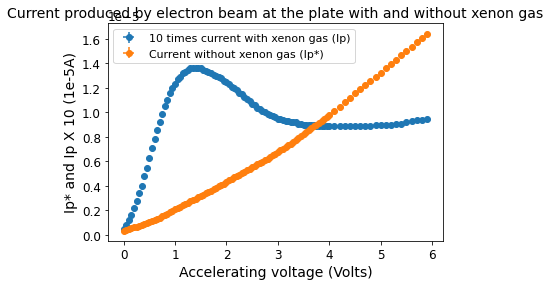

In [15]:
# Plotting data points with error bars
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

plt.errorbar(V[0:100], 10 * Ip[0:100], Ip_error[0:100], V_error[0:100],
             fmt = 'o', label = "10 times current with xenon gas (Ip)")

plt.errorbar(V[0:100], Ip_star[0:100], Ip_star_error[0:100], V_error[0:100],
             fmt = 'o', label = 'Current without xenon gas (Ip*)')

#Error bars are present but so small as to not be visible

plt.xlabel("Accelerating voltage (Volts)", fontsize = 14)
plt.ylabel("Ip* and Ip X 10 (1e-5A)", fontsize = 14)
plt.title("Current produced by electron beam at the plate with and without xenon gas"
          , fontsize = 14)
plt.legend(fontsize = 11)
plt.savefig("Ip Ip_star plot",dpi = 100, bbox_inches = "tight")

In [16]:
# Error on Ps
# Ps = 1 - (Ip * Is_star)/(Is * Ip_star)
# Propagation of Errors onto probability of scattering Ps.
Ps_error = np.sqrt( (Is_star/(Is * Ip_star))**2 * Ip_error**2 +
                    (Ip/(Is * Ip_star))**2 * Is_star_error**2 +
                    (Ip * Is_star/(Is**2 * Ip_star))**2 * Is_error**2 +
                    (Ip * Is_star/(Is * Ip_star**2))**2 * Ip_star_error**2 )


e_momentum = np.sqrt(V - Vs)
# Propagating error onto np.sqrt(V + Vs)
e_momentum_error = np.sqrt( ((V - Vs)**(-1/2) / 2)**2 * V_error**2 +
                            ((V - Vs)**(-1/2) / 2)**2 * Vs_error**2 )


<ipython-input-16-bf1d39ac33e4>:10: RuntimeWarning: invalid value encountered in sqrt
  e_momentum = np.sqrt(V - Vs)
<ipython-input-16-bf1d39ac33e4>:12: RuntimeWarning: invalid value encountered in power
  e_momentum_error = np.sqrt( ((V - Vs)**(-1/2) / 2)**2 * V_error**2 +
<ipython-input-16-bf1d39ac33e4>:13: RuntimeWarning: invalid value encountered in power
  ((V - Vs)**(-1/2) / 2)**2 * Vs_error**2 )


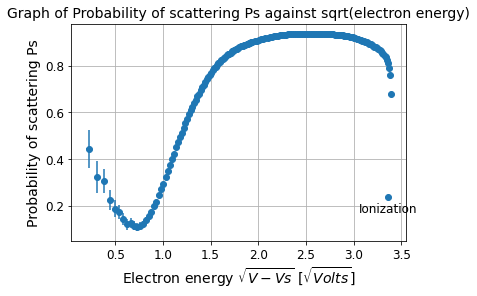

In [17]:
# Ps is the probability of an electron scattering off the xenon gas.

Ps = 1 - (Ip * Is_star)/(Is * Ip_star)


# Creating graph of Probability of scattering against electron momentum
plt.errorbar(e_momentum[1:-10], Ps[1:-10], Ps_error[1:-10], e_momentum_error[1:-10],
             fmt = 'o')

plt.title("Graph of Probability of scattering Ps against sqrt(electron energy)"
          , fontsize = 14)
plt.xlabel('Electron energy $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of scattering Ps", fontsize = 14)

plt.text(3.05, 0.17,"Ionization")
plt.grid(True)
plt.savefig("Ps graph",dpi = 100, bbox_inches = "tight" )




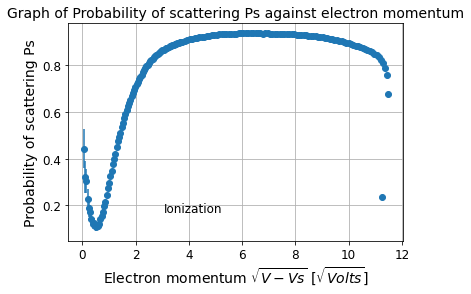

In [18]:
# Ps is the probability of an electron scattering off the xenon gas.

Ps = 1 - (Ip * Is_star)/(Is * Ip_star)


# Creating graph of Probability of scattering against electron momentum
plt.errorbar((V-Vs)[1:-10], Ps[1:-10], Ps_error[1:-10],
             fmt = 'o')

plt.title("Graph of Probability of scattering Ps against electron momentum"
          , fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of scattering Ps", fontsize = 14)

plt.text(3.05, 0.17,"Ionization")
plt.grid(True)
plt.savefig("Ps graph",dpi = 100, bbox_inches = "tight" )




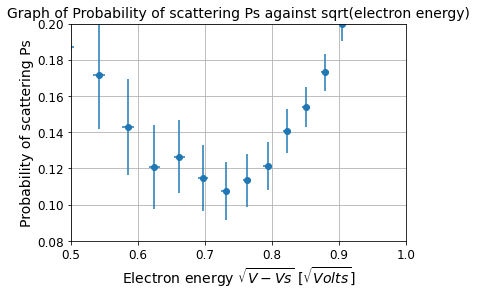

In [19]:
# Zooming in on the local minimum of probability of scattering.

plt.errorbar(e_momentum[1:20], Ps[1:20], Ps_error[1:20], e_momentum_error[1:20],
             fmt = 'o')

plt.title("Graph of Probability of scattering Ps against sqrt(electron energy)"
          , fontsize = 14)

plt.xlabel('Electron energy $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of scattering Ps", fontsize = 14)

plt.axis([0.5,1,0.08,0.2])

plt.grid(True)
plt.savefig("Ps graph zoom",dpi = 100, bbox_inches = "tight" )


In [20]:
print(e_momentum[10:12],"\n", e_momentum_error[10:12])


[0.6969218  0.73047929] 
 [0.00717476 0.00684516]


### Mean free path $\lambda = \frac{-l}{ln(1-Ps)}$

In [21]:
# Length from shield to plate is 0.7cm
l = 0.7

# mean free path lambda
mean_free_path = -l / (np.log(1-Ps[1:-10]))

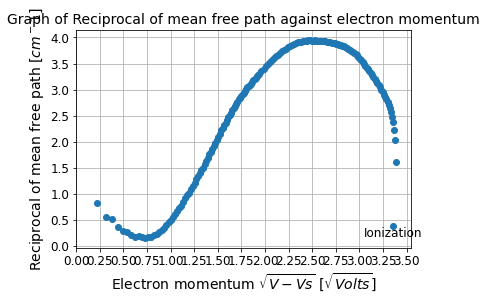

In [22]:
#Plotting reciprocal of mean free path versus electron momentum

plt.plot(np.sqrt(V[1:-10]-Vs[1:-10]), 1/mean_free_path, "o")
plt.title("Graph of Reciprocal of mean free path against electron momentum", fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Reciprocal of mean free path [$cm^-1$]", fontsize = 14)

plt.text(3.05, 0.17,"Ionization")


plt.xticks(np.arange(0,3.75,0.25))
plt.grid(True)
plt.savefig("1 over lambda graph")

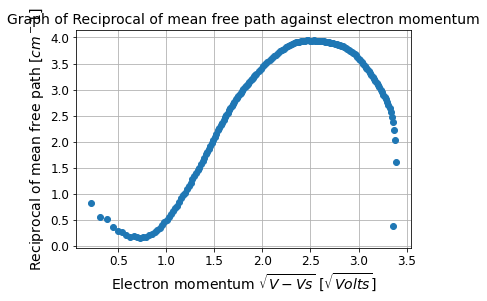

In [23]:
#Plotting reciprocal of mean free path versus electron momentum

plt.plot(np.sqrt(V[1:-10]-Vs[1:-10]), 1/mean_free_path, "o")
plt.title("Graph of Reciprocal of mean free path against electron momentum", fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Reciprocal of mean free path [$cm^-1$]", fontsize = 14)

#plt.text(3.05, 0.17,"Ionization")

#plt.axis([0.5,1,0,50])
#plt.xticks(np.arange(0,3.75,0.25))
plt.grid(True)
plt.savefig("1 over lambda graph")


## Probability of collision graph

In [24]:
# Pressure in torr of xenon
P = 0.05

P_collision = -P/(l) * np.log(Ip * Is_star/ (Is * Ip_star))

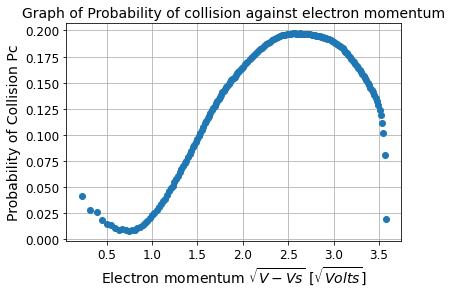

In [25]:
# Plotting probability of collision against electron momentum

plt.plot(np.sqrt(V[1:-10]), P_collision[1:-10], "o")
plt.title("Graph of Probability of collision against electron momentum", fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of Collision Pc", fontsize = 14)

#plt.text(3.05, 0.17,"Ionization")



plt.grid(True)
plt.savefig("P(collision) graph")


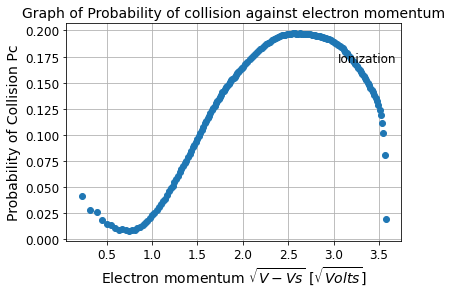

In [26]:
# Plotting probability of collision against electron momentum

plt.plot(np.sqrt(V[1:-10]), P/mean_free_path, "o")
plt.title("Graph of Probability of collision against electron momentum", fontsize = 14)
plt.xlabel('Electron momentum $\sqrt{V-Vs}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of Collision Pc", fontsize = 14)

plt.text(3.05, 0.17,"Ionization")



plt.grid(True)
plt.savefig("P(collision) graph")


# Extension

### V bar from plot of ln(Ip*) against Vp

In [27]:
Results_extension = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [25,26,27,28,29,30,31])
Results_extension.head(11)

,V (V).2,Vp* (mV).1,Vs* (mV).1,Rp.1,Rs.1,Ip*.1,Is*.1
0,0.00,3.9,3.0,10000.0,100.0,3.900000e-07,0.000030
1,-0.05,3.1,2.1,10000.0,100.0,3.100000e-07,0.000021
2,-0.10,2.4,1.5,10000.0,100.0,2.400000e-07,0.000015
3,-0.15,1.7,1.0,10000.0,100.0,1.700000e-07,0.000010
4,-0.20,1.1,0.6,10000.0,100.0,1.100000e-07,0.000006
5,-0.25,0.7,0.3,10000.0,100.0,7.000000e-08,0.000003
6,-0.30,0.4,0.2,10000.0,100.0,4.000000e-08,0.000002
7,-0.35,0.2,0.1,10000.0,100.0,2.000000e-08,0.000001
8,-0.40,0.1,0.0,10000.0,100.0,1.000000e-08,0.000000
9,-0.45,0.0,0.0,10000.0,100.0,0.000000e+00,0.000000


In [28]:
# Importing raw data from extension run 1.
Results_extension = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [25,26,27,28,29,30,31])


# V_extension is the accelerating voltage.
V_extension = np.array(Results_extension["V (V).2"])

# Vs*_extension is the voltage of the electron beam at the shield, before they 
# went through the xenon gas
# multiplying by 0.001 turns Vs values from mV to V
Vs_star_extension = np.array(Results_extension["Vs* (mV).1"]*0.001) 

Vp_star_extension = np.array(Results_extension["Vp* (mV).1"]*0.001) 


# Ip*_extension is the current for the beam at the plate, with 
# the xenon gas frozen out. So no scattering occurs.
Ip_star_extension = np.array(Results_extension["Ip*.1"])

# Is*_extension is the current for the beam at the shield, with 
# the xenon gas frozen out.
Is_star_extension = np.array(Results_extension["Is*.1"])

V_plus_Vs = V_extension + Vs_star_extension
ln_Is_star_extension = np.log(Is_star_extension)

Rp = 10000
Rs = 100

<ipython-input-28-567c5c917734>:26: RuntimeWarning: divide by zero encountered in log
  ln_Is_star_extension = np.log(Is_star_extension)


In [29]:
# Errors on extension variables.

# Error on V
V_extension_error = np.array ([0.01]*9)

# Errors on Vs* and Vp*
Vs_star_extension_error = np.array([0.1e-3]*9)
Vp_star_extension_error = np.array([0.1e-3]*9)

# Propagation of errors on Is*
Is_star_extension_error = np.sqrt( (1/100)**2 * Vs_star_extension_error**2 )

# Propagation of error on ln(Is*)
ln_Is_star_extension_error = np.sqrt( (1/Is_star_extension[:9])**2 
                                        * Is_star_extension_error**2 )

# Error on V_plus_Vs
V_plus_Vs_error = np.sqrt( V_extension_error**2 + Vs_star_extension_error**2 )

<ipython-input-29-94b783fcbbbb>:14: RuntimeWarning: divide by zero encountered in true_divide
  ln_Is_star_extension_error = np.sqrt( (1/Is_star_extension[:9])**2


C:\Users\robtk\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
<ipython-input-30-04006b0b6365>:7: RuntimeWarning: divide by zero encountered in log
  pars1, cov1 = curve_fit(fitfunc, V_plus_Vs[0:4],  np.log(Is_star_extension)[0:4])
<ipython-input-30-04006b0b6365>:15: RuntimeWarning: divide by zero encountered in log
  pars2, cov2 = curve_fit(fitfunc, V_plus_Vs[4:8],  np.log(Is_star_extension)[4:8])


[  7.16964041 -10.42732107]
[[0.04100009 0.00299711]
 [0.00299711 0.00035062]]
[11.52505454 -9.75369834]
[[0.65266236 0.17928635]
 [0.17928635 0.05130261]]


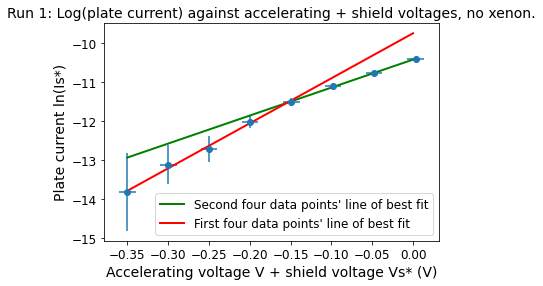

In [30]:
# Graph of extension run 1.
plt.errorbar(V_plus_Vs[:9], ln_Is_star_extension[:9], 
             ln_Is_star_extension_error[:9], V_plus_Vs_error[:9],
             fmt = 'o')

# Line of best fit 1
pars1, cov1 = curve_fit(fitfunc, V_plus_Vs[0:4],  np.log(Is_star_extension)[0:4])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars1), 'g-'
         , linewidth = '2', label = "Second four data points' line of best fit")
print(pars1)
print(cov1)

# Line of best fit 2
pars2, cov2 = curve_fit(fitfunc, V_plus_Vs[4:8],  np.log(Is_star_extension)[4:8])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars2), 'r-'
         , linewidth = '2', label = "First four data points' line of best fit")
print(pars2)
print(cov2)

plt.title("Run 1: Log(plate current) against accelerating + shield voltages, no xenon."
          , fontsize = 14)
plt.xlabel("Accelerating voltage V + shield voltage Vs* (V)", fontsize = 14)
plt.ylabel("Plate current ln(Is*)", fontsize = 14)
plt.legend(loc = "lower right")
plt.savefig("Extension run 1",dpi = 100, bbox_inches = "tight" )

### Extension run 2

In [47]:
Results_extension_2 = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [36,37,38,39,40,41,42])
Results_extension_2.head(11)

,V (V).3,Vp* (mV).2,Vs* (mV).2,Rp.2,Rs.2,Ip*.2,Is*.2
0,0.00,3.8,2.9,10000.0,100.0,3.800000e-07,0.000029
1,-0.05,3.0,2.1,10000.0,100.0,3.000000e-07,0.000021
2,-0.10,2.3,1.4,10000.0,100.0,2.300000e-07,0.000014
3,-0.15,1.6,0.9,10000.0,100.0,1.600000e-07,0.000009
4,-0.20,1.1,0.6,10000.0,100.0,1.100000e-07,0.000006
5,-0.25,0.7,0.3,10000.0,100.0,7.000000e-08,0.000003
6,-0.30,0.4,0.2,10000.0,100.0,4.000000e-08,0.000002
7,-0.35,0.2,0.1,10000.0,100.0,2.000000e-08,0.000001
8,-0.40,0.1,0.0,10000.0,100.0,1.000000e-08,0.000000
9,-0.45,0.0,0.0,10000.0,100.0,0.000000e+00,0.000000


In [48]:
# Importing raw data from extension run 2.
Results_extension_2 = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [36,37,38,39,40,41,42])

# V is the accelerating voltage 
V_extension_2 = np.array(Results_extension_2["V (V).3"])

# Vs*_extension_2 is the voltage of the electron beam at the shield, before they 
# went through the xenon gas
# multiplying by 0.001 turns Vs values from mV to V
Vs_star_extension_2 = np.array(Results_extension_2["Vs* (mV).2"]*0.001) 

Vp_star_extension_2 = np.array(Results_extension_2["Vp* (mV).2"]*0.001) 

# Is_star is the current for the beam at the shield, with 
# the xenon gas frozen out.
Is_star_extension_2 = np.array(Results_extension_2["Is*.2"])

ln_Is_star_extension_2 = np.log(Is_star_extension_2)

Rp = 10000
Rs = 100

<ipython-input-48-5cd7510e6bed>:19: RuntimeWarning: divide by zero encountered in log
  ln_Is_star_extension_2 = np.log(Is_star_extension_2)


In [49]:
# Some error values are the same as before so I use the same objects as defined in run 1.

Is_star_extension_error_2 = Is_star_extension_error

V_plus_Vs_error_2 = V_plus_Vs_error

ln_Is_star_extension_error_2 = np.sqrt( (1/Is_star_extension_2[:9])**2 
                                        * Is_star_extension_error_2**2 )

V_plus_Vs_2 = V_extension_2 + Vs_star_extension_2

<ipython-input-49-2c9e1e7f1838>:7: RuntimeWarning: divide by zero encountered in true_divide
  ln_Is_star_extension_error_2 = np.sqrt( (1/Is_star_extension_2[:9])**2


C:\Users\robtk\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
<ipython-input-50-3d98efbd26a5>:8: RuntimeWarning: divide by zero encountered in log
  pars1_2, cov1_2 = curve_fit(fitfunc, V_plus_Vs_2[0:4],  np.log(Is_star_extension_2)[0:4])
<ipython-input-50-3d98efbd26a5>:15: RuntimeWarning: divide by zero encountered in log
  pars2_2, cov2_2 = curve_fit(fitfunc, V_plus_Vs_2[4:8],  np.log(Is_star_extension_2)[4:8])


[  7.72711379 -10.43805396]
[[0.14749542 0.01079298]
 [0.01079298 0.00126314]]
[11.52505454 -9.75369834]
[[0.65266236 0.17928635]
 [0.17928635 0.05130261]]


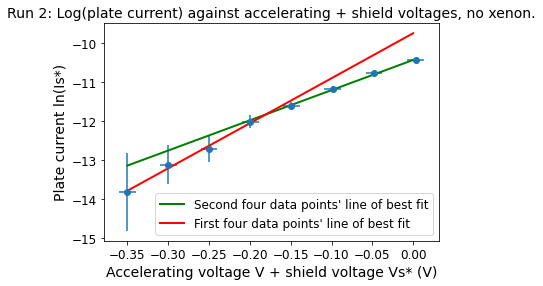

In [50]:
# Creating graph of extension run 2
# Plotting data points with error bars.
plt.errorbar(V_plus_Vs_2[:9], ln_Is_star_extension_2[:9], 
             ln_Is_star_extension_error_2[:9], V_plus_Vs_error_2[:9],
             fmt = 'o')

# Line of best fit 1
pars1_2, cov1_2 = curve_fit(fitfunc, V_plus_Vs_2[0:4],  np.log(Is_star_extension_2)[0:4])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars1_2), 'g-'
         , linewidth = '2', label = "Second four data points' line of best fit")
print(pars1_2)
print(cov1_2)
# Line of best fit 2
pars2_2, cov2_2 = curve_fit(fitfunc, V_plus_Vs_2[4:8],  np.log(Is_star_extension_2)[4:8])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars2_2), 'r-'
         , linewidth = '2', label = "First four data points' line of best fit")
print(pars2_2)
print(cov2_2)

plt.title("Run 2: Log(plate current) against accelerating + shield voltages, no xenon."
          , fontsize = 14)
plt.xlabel("Accelerating voltage V + shield voltage Vs* (V)", fontsize = 14)
plt.ylabel("Plate current ln(Is*)", fontsize = 14)
plt.legend(loc = "lower right")
plt.savefig("Extension run 2",dpi = 100, bbox_inches = "tight" )

## Extension run 3

In [51]:
Results_extension_3 = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [46,47,48,49,50,51,52])
Results_extension_3 = Results_extension_3.drop(np.linspace(11,179,1),axis = 0)

Results_extension_3

,V (V).4,Vp* (mV).3,Vs* (mV).3,Rp.3,Rs.3,Ip*.3,Is*.3
0,0.00,3.9,3.0,10000.0,100.0,3.900000e-07,0.000030
1,-0.05,3.1,2.1,10000.0,100.0,3.100000e-07,0.000021
2,-0.10,2.4,1.5,10000.0,100.0,2.400000e-07,0.000015
3,-0.15,1.7,1.0,10000.0,100.0,1.700000e-07,0.000010
4,-0.20,1.1,0.6,10000.0,100.0,1.100000e-07,0.000006
...,...,...,...,...,...,...,...
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Importing raw data with xenon gas present from Excel into python.
# Creating a data frame in python of the raw data.
Results_extension_3 = pd.read_excel(path+"Ramsauer-Townsend Raw Data.xlsx",
                              usecols = [46,47,48,49,50,51,52])

# V is the accelerating voltage 
V_extension_3 = np.array(Results_extension_3["V (V).4"])

# Vs*_extension_3 is the voltage of the electron beam at the shield, before they 
# went through the xenon gas
# multiplying by 0.001 turns Vs values from mV to V
Vs_star_extension_3 = np.array(Results_extension_3["Vs* (mV).3"]*0.001) 

Vp_star_extension_3 = np.array(Results_extension_3["Vp* (mV).3"]*0.001) 

# Is_star is the current for the beam at the shield, with 
# the xenon gas frozen out.
Is_star_extension_3 = np.array(Results_extension_3["Is*.3"])

ln_Is_star_extension_3 = np.log(Is_star_extension_3)
V_plus_Vs_3 = V_extension_3 + Vs_star_extension_3


Rp = 10000
Rs = 100


<ipython-input-52-eb45d6c54b99>:20: RuntimeWarning: divide by zero encountered in log
  ln_Is_star_extension_3 = np.log(Is_star_extension_3)


In [53]:
# Some error values are the same as before so I use the same objects as defined in run 1.

Is_star_extension_error_3 = Is_star_extension_error

V_plus_Vs_error_3 = V_plus_Vs_error

ln_Is_star_extension_error_3 = np.sqrt( (1/Is_star_extension_2[:9])**2 
                                        * Is_star_extension_error_3**2 )

<ipython-input-53-ac5becef848f>:7: RuntimeWarning: divide by zero encountered in true_divide
  ln_Is_star_extension_error_3 = np.sqrt( (1/Is_star_extension_2[:9])**2


C:\Users\robtk\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3412: RuntimeWarning: invalid value encountered in double_scalars
  high = [v if up else v + e for v, e, up in zip(data, b, uplims)]
<ipython-input-54-a300b6f59871>:6: RuntimeWarning: divide by zero encountered in log
  pars1_3, cov1_3 = curve_fit(fitfunc, V_plus_Vs_3[0:4],  np.log(Is_star_extension_3)[0:4])
<ipython-input-54-a300b6f59871>:14: RuntimeWarning: divide by zero encountered in log
  pars2_3, cov2_3 = curve_fit(fitfunc, V_plus_Vs_3[4:8],  np.log(Is_star_extension_3)[4:8])


[  7.16964041 -10.42732107]
[[0.04100009 0.00299711]
 [0.00299711 0.00035062]]
[12.09526572 -9.52544319]
[[0.99195951 0.27246648]
 [0.27246648 0.07796072]]


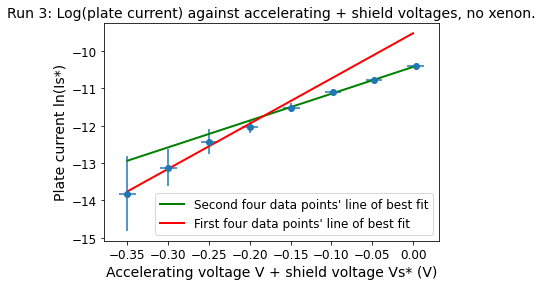

In [54]:
# Plotting data points with error bars.
plt.errorbar(V_plus_Vs_3[:9], ln_Is_star_extension_3[:9], 
             ln_Is_star_extension_error_3[:9], V_plus_Vs_error_3[:9],
             fmt = 'o')
# Line of best fit 1
pars1_3, cov1_3 = curve_fit(fitfunc, V_plus_Vs_3[0:4],  np.log(Is_star_extension_3)[0:4])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars1_3), 'g-'
         , linewidth = '2', label = "Second four data points' line of best fit")
print(pars1_3)
print(cov1_3)

# Line of best fit 2
pars2_3, cov2_3 = curve_fit(fitfunc, V_plus_Vs_3[4:8],  np.log(Is_star_extension_3)[4:8])

plt.plot(np.linspace(-.35,0,3), fitfunc(np.linspace(-.35,0,3), *pars2_3), 'r-'
         ,linewidth = '2', label = "First four data points' line of best fit")
print(pars2_3)
print(cov2_3)

plt.title("Run 3: Log(plate current) against accelerating + shield voltages, no xenon."
          , fontsize = 14)
plt.xlabel("Accelerating voltage V + shield voltage Vs* (V)", fontsize = 14)
plt.ylabel("Plate current ln(Is*)", fontsize = 14)
plt.legend(loc = "lower right")
plt.savefig("Extension run 3",dpi = 100, bbox_inches = "tight" )

In [55]:
print(pars2, cov2)
print(pars2_2, cov2_2)
print(pars2_3, cov2_3)

[11.52505454 -9.75369834] [[0.65266236 0.17928635]
 [0.17928635 0.05130261]]
[11.52505454 -9.75369834] [[0.65266236 0.17928635]
 [0.17928635 0.05130261]]
[12.09526572 -9.52544319] [[0.99195951 0.27246648]
 [0.27246648 0.07796072]]


## Putting extension into original

 Intersection of lines of best fit = Vc <br>
 pars[0] = slope <br>
 pars[1] = intersection with y axis <br>

<br>
y = pars1[0] * x + pars1[1] <br>
y = pars2[0] * x + pars2[1]

=> At the point of intersection : pars1[0] * x + pars1[1] = pars2[0] * x + pars2[1] <br>
=> x ( pars1[0] - pars2[0] ) = pars2[1] - pars1[1] <br>
=> x = $\frac{pars2[1] - pars1[1]}{pars1[0]-pars2[0]}$


Vc = -x, the absolute value of the x component of the point of intersection

In [56]:
# Intersection point following above derivation.

Vc_1 = -(pars2[1] - pars1[1]) /(pars1[0]-pars2[0])

Vc_2 = -(pars2_2[1] - pars1_2[1]) /(pars1_2[0]-pars2_2[0])

Vc_3 = -(pars2_3[1] - pars1_3[1]) /(pars1_3[0]-pars2_3[0])

Vc = 1/3 * (Vc_1 + Vc_2 +Vc_3)

In [57]:
print(Vc,V_bar)

NameError: name 'V_bar' is not defined

In [58]:
# V_bar = -3/(2 * average slope of the red lines of best fit from the 3 runs ).
m = ( pars2[0] + pars2_2[0] + pars2_3[0] ) / 3
V_bar = 3/( 2 * m )


In [59]:
# Propagating error on Vc_1
Vc_1_error = np.sqrt((-1/(pars1[0]-pars2[0]))**2 * cov2[1,1] +
                     (-1/(pars1[0]-pars2[0]))**2 * cov1[1,1] +
                     ((pars2[1] - pars1[1]) /(pars1[0]-pars2[0])**2)**2 * cov1[0,0] +
                     (-(pars2[1] - pars1[1]) /(pars1[0]-pars2[0])**2)**2 * cov2[0,0])

# Propagating error on Vc_2
Vc_2_error = np.sqrt((-1/(pars1_2[0]-pars2_2[0]))**2 * cov2_2[1,1] +
                     (-1/(pars1_2[0]-pars2_2[0]))**2 * cov1_2[1,1] +
                     ((pars2_2[1] - pars1_2[1]) /(pars1_2[0]-pars2_2[0])**2)**2 * cov1_2[0,0] +
                     (-(pars2_2[1] - pars1_2[1]) /(pars1_2[0]-pars2_2[0])**2)**2 * cov2_2[0,0])

# Propagating error on Vc_3
Vc_3_error = np.sqrt((-1/(pars1_3[0]-pars2_3[0]))**2 * cov2_3[1,1] +
                     (-1/(pars1_3[0]-pars2_3[0]))**2 * cov1_3[1,1] +
                     ((pars2_3[1] - pars1_3[1]) /(pars1_3[0]-pars2_3[0])**2)**2 * cov1_3[0,0] +
                     (-(pars2_3[1] - pars1_3[1]) /(pars1_3[0]-pars2_3[0])**2)**2 * cov2_3[0,0])

# Propagating error on Vc.
# Vc = 
Vc_error = np.sqrt( 1/3**2 * Vc_1_error**2 +
                    1/3**2 * Vc_2_error**2 +
                    1/3**2 * Vc_3_error**2 )



# The errors on the slopes are the square roots of the 1,1 entry in the covariance matrix
# corresponding to that line of best fit.

m_error = np.sqrt( 1/3**2 * np.sqrt(cov2[0,0])**2 +
                   1/3**2 * np.sqrt(cov2_2[0,0])**2 +
                   1/3**2 * np.sqrt(cov2_3[0,0])**2 ) 

# Error on V_bar is the propagation of the errors on the 3 lines of best fit
V_bar_error = (3/(2 * m**2))**2 * m_error**2


e_momentum_extension = np.sqrt(V - Vs + Vc + V_bar)

# Propagation error onto e_momentum_extension
e_momentum_extension_error = np.sqrt( ( (V - Vs + Vc + V_bar)**(-1/2) / 2)**2 * V_error**2 +
                                      ( (V - Vs + Vc + V_bar)**(-1/2) / 2)**2 * Vs_error**2 +
                                      ( (V - Vs + Vc + V_bar)**(-1/2) / 2)**2 * Vc_error**2 +
                                      ( (V - Vs + Vc + V_bar)**(-1/2) / 2)**2 * V_bar_error**2)



In [60]:
print(Vc_error)
print(V_bar_error)

0.039013029945759496
3.0490675332341787e-05


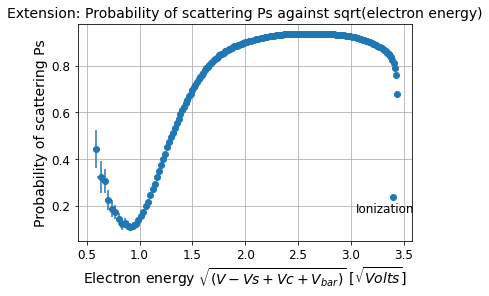

In [61]:
## Plotting probability of scattering against corrected electron momentum
# Creating graph of Probability of scattering against electron momentum
plt.errorbar(e_momentum_extension[1:-10], Ps[1:-10], Ps_error[1:-10],
             e_momentum_extension_error[1:-10],
             fmt = 'o')


plt.title("Extension: Probability of scattering Ps against sqrt(electron energy)"
          , fontsize = 14)
plt.xlabel('Electron energy $\sqrt{(V-Vs+Vc+V_{bar})}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of scattering Ps", fontsize = 14)

plt.text(3.05, 0.17,"Ionization")
plt.grid(True)
plt.savefig("Ps graph extension",dpi = 100, bbox_inches = "tight")

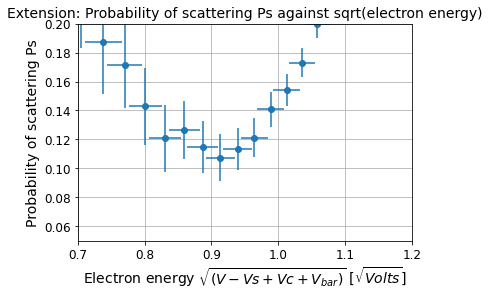

In [62]:
# Zooming in on the local minimum of probability of scattering.

plt.errorbar(e_momentum_extension[1:20], Ps[1:20], Ps_error[1:20],
             e_momentum_extension_error[1:20],
             fmt = 'o')


plt.title("Extension: Probability of scattering Ps against sqrt(electron energy)",
          fontsize = 14)
plt.xlabel('Electron energy $\sqrt{(V-Vs+Vc+V_{bar})}$ [$\sqrt{Volts}$]', fontsize = 14)
plt.ylabel("Probability of scattering Ps", fontsize = 14)


plt.axis([0.7,1.2,0.05,0.2])
plt.grid(True)
plt.savefig("Ps graph, extension zoom",dpi = 100, bbox_inches = "tight")

In [63]:
print(e_momentum_extension[10:15])
print(e_momentum_extension_error[10:15])

[0.88678681 0.91339523 0.93919691 0.96425663 0.98863079]
[0.02270805 0.02204654 0.02144087 0.02088365 0.02036878]


In [64]:
Results_extension

,V (V).2,Vp* (mV).1,Vs* (mV).1,Rp.1,Rs.1,Ip*.1,Is*.1
0,0.00,3.9,3.0,10000.0,100.0,3.900000e-07,0.000030
1,-0.05,3.1,2.1,10000.0,100.0,3.100000e-07,0.000021
2,-0.10,2.4,1.5,10000.0,100.0,2.400000e-07,0.000015
3,-0.15,1.7,1.0,10000.0,100.0,1.700000e-07,0.000010
4,-0.20,1.1,0.6,10000.0,100.0,1.100000e-07,0.000006
...,...,...,...,...,...,...,...
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
print(Results_with_xenon.to_latex( index = False))

Results_without_xenon.to_latex("table2.tex", index = False)

Results_extension.to_latex("table3.tex", index = False)

Results_extension_2.to_latex("table4.tex", index = False)

Results_extension_3.to_latex("table5.tex", index = False)

\begin{tabular}{rrrrrrr}
\toprule
 V (V) &  Vp (mV) &  Vs (mV) &    Rp &  Rs &           Ip &       Is \\
\midrule
  0.00 &      0.5 &      0.9 & 10000 & 100 & 5.000000e-08 & 0.000009 \\
  0.05 &      0.8 &      1.4 & 10000 & 100 & 8.000000e-08 & 0.000014 \\
  0.10 &      1.2 &      2.0 & 10000 & 100 & 1.200000e-07 & 0.000020 \\
  0.15 &      1.6 &      3.0 & 10000 & 100 & 1.600000e-07 & 0.000030 \\
  0.20 &      2.2 &      4.1 & 10000 & 100 & 2.200000e-07 & 0.000041 \\
  0.25 &      2.8 &      5.5 & 10000 & 100 & 2.800000e-07 & 0.000055 \\
  0.30 &      3.4 &      7.1 & 10000 & 100 & 3.400000e-07 & 0.000071 \\
  0.35 &      4.0 &      8.4 & 10000 & 100 & 4.000000e-07 & 0.000084 \\
  0.40 &      4.8 &     10.3 & 10000 & 100 & 4.800000e-07 & 0.000103 \\
  0.45 &      5.5 &     12.2 & 10000 & 100 & 5.500000e-07 & 0.000122 \\
  0.50 &      6.3 &     14.3 & 10000 & 100 & 6.300000e-07 & 0.000143 \\
  0.55 &      7.1 &     16.4 & 10000 & 100 & 7.100000e-07 & 0.000164 \\
  0.60 &      7.8 &  

In [66]:
print(Results_without_xenon.to_latex(index = False))



\begin{tabular}{rrrrrrr}
\toprule
 V (V).1 &  Vp* (mV) &  Vs* (mV) &   Rp* &  Rs* &          Ip* &      Is* \\
\midrule
    0.00 &       3.4 &       3.1 & 10000 &  100 & 3.400000e-07 & 0.000031 \\
    0.05 &       4.1 &       4.0 & 10000 &  100 & 4.100000e-07 & 0.000040 \\
    0.10 &       4.7 &       5.3 & 10000 &  100 & 4.700000e-07 & 0.000053 \\
    0.15 &       5.3 &       6.9 & 10000 &  100 & 5.300000e-07 & 0.000069 \\
    0.20 &       6.1 &       8.8 & 10000 &  100 & 6.100000e-07 & 0.000088 \\
    0.25 &       6.7 &      10.7 & 10000 &  100 & 6.700000e-07 & 0.000107 \\
    0.30 &       7.4 &      12.8 & 10000 &  100 & 7.400000e-07 & 0.000128 \\
    0.35 &       8.0 &      14.4 & 10000 &  100 & 8.000000e-07 & 0.000144 \\
    0.40 &       8.8 &      16.6 & 10000 &  100 & 8.800000e-07 & 0.000166 \\
    0.45 &       9.6 &      18.6 & 10000 &  100 & 9.600000e-07 & 0.000186 \\
    0.50 &      10.4 &      20.9 & 10000 &  100 & 1.040000e-06 & 0.000209 \\
    0.55 &      11.4 &      23.5 

In [67]:


print(Results_extension.to_latex(index = False))



\begin{tabular}{rrrrrrr}
\toprule
 V (V).2 &  Vp* (mV).1 &  Vs* (mV).1 &    Rp.1 &  Rs.1 &        Ip*.1 &    Is*.1 \\
\midrule
    0.00 &         3.9 &         3.0 & 10000.0 & 100.0 & 3.900000e-07 & 0.000030 \\
   -0.05 &         3.1 &         2.1 & 10000.0 & 100.0 & 3.100000e-07 & 0.000021 \\
   -0.10 &         2.4 &         1.5 & 10000.0 & 100.0 & 2.400000e-07 & 0.000015 \\
   -0.15 &         1.7 &         1.0 & 10000.0 & 100.0 & 1.700000e-07 & 0.000010 \\
   -0.20 &         1.1 &         0.6 & 10000.0 & 100.0 & 1.100000e-07 & 0.000006 \\
   -0.25 &         0.7 &         0.3 & 10000.0 & 100.0 & 7.000000e-08 & 0.000003 \\
   -0.30 &         0.4 &         0.2 & 10000.0 & 100.0 & 4.000000e-08 & 0.000002 \\
   -0.35 &         0.2 &         0.1 & 10000.0 & 100.0 & 2.000000e-08 & 0.000001 \\
   -0.40 &         0.1 &         0.0 & 10000.0 & 100.0 & 1.000000e-08 & 0.000000 \\
   -0.45 &         0.0 &         0.0 & 10000.0 & 100.0 & 0.000000e+00 & 0.000000 \\
   -0.50 &         NaN &         

In [68]:


print(Results_extension_2.to_latex(index = False))



\begin{tabular}{rrrrrrr}
\toprule
 V (V).3 &  Vp* (mV).2 &  Vs* (mV).2 &    Rp.2 &  Rs.2 &        Ip*.2 &    Is*.2 \\
\midrule
    0.00 &         3.8 &         2.9 & 10000.0 & 100.0 & 3.800000e-07 & 0.000029 \\
   -0.05 &         3.0 &         2.1 & 10000.0 & 100.0 & 3.000000e-07 & 0.000021 \\
   -0.10 &         2.3 &         1.4 & 10000.0 & 100.0 & 2.300000e-07 & 0.000014 \\
   -0.15 &         1.6 &         0.9 & 10000.0 & 100.0 & 1.600000e-07 & 0.000009 \\
   -0.20 &         1.1 &         0.6 & 10000.0 & 100.0 & 1.100000e-07 & 0.000006 \\
   -0.25 &         0.7 &         0.3 & 10000.0 & 100.0 & 7.000000e-08 & 0.000003 \\
   -0.30 &         0.4 &         0.2 & 10000.0 & 100.0 & 4.000000e-08 & 0.000002 \\
   -0.35 &         0.2 &         0.1 & 10000.0 & 100.0 & 2.000000e-08 & 0.000001 \\
   -0.40 &         0.1 &         0.0 & 10000.0 & 100.0 & 1.000000e-08 & 0.000000 \\
   -0.45 &         0.0 &         0.0 & 10000.0 & 100.0 & 0.000000e+00 & 0.000000 \\
   -0.50 &         NaN &         

In [69]:


print(Results_extension_3.to_latex(index = False))

\begin{tabular}{rrrrrrr}
\toprule
 V (V).4 &  Vp* (mV).3 &  Vs* (mV).3 &    Rp.3 &  Rs.3 &        Ip*.3 &    Is*.3 \\
\midrule
    0.00 &         3.9 &         3.0 & 10000.0 & 100.0 & 3.900000e-07 & 0.000030 \\
   -0.05 &         3.1 &         2.1 & 10000.0 & 100.0 & 3.100000e-07 & 0.000021 \\
   -0.10 &         2.4 &         1.5 & 10000.0 & 100.0 & 2.400000e-07 & 0.000015 \\
   -0.15 &         1.7 &         1.0 & 10000.0 & 100.0 & 1.700000e-07 & 0.000010 \\
   -0.20 &         1.1 &         0.6 & 10000.0 & 100.0 & 1.100000e-07 & 0.000006 \\
   -0.25 &         0.7 &         0.4 & 10000.0 & 100.0 & 7.000000e-08 & 0.000004 \\
   -0.30 &         0.4 &         0.2 & 10000.0 & 100.0 & 4.000000e-08 & 0.000002 \\
   -0.35 &         0.2 &         0.1 & 10000.0 & 100.0 & 2.000000e-08 & 0.000001 \\
   -0.40 &         0.1 &         0.0 & 10000.0 & 100.0 & 1.000000e-08 & 0.000000 \\
   -0.45 &         0.0 &         0.0 & 10000.0 & 100.0 & 0.000000e+00 & 0.000000 \\
   -0.50 &         NaN &         